# Setup

In [2]:
%reload_ext autoreload
%autoreload 2

In [3]:
from database_creation.database import Database

# Annotation task pipeline

## Creation of the queries (create_queries)

### Parameters

In [4]:
max_size = 10000
min_articles = 1
min_queries = 1

### Preprocessing the database

In [5]:
database = Database(max_size=max_size, min_articles=min_articles, min_queries=min_queries)

In [6]:
database.preprocess_database()


Preprocessing the database...

Computing the database' article...
Done (elapsed time: 0s).


Cleaning the database...
Initial length of articles: 10000
Criterion: Check if an article's data is complete, ie if its annotation file exists.
Final length of articles: 6514
Done (elapsed time: 46s).


Computing the articles' metadata...
  article 1000/6514...
  article 2000/6514...
  article 3000/6514...
  article 4000/6514...
  article 5000/6514...
  article 6000/6514...
Done (elapsed time: 13s).


Computing the entity tuples...
  article 1000/6514...
  article 2000/6514...
  article 3000/6514...
  article 4000/6514...
  article 5000/6514...
  article 6000/6514...
Done (elapsed time: 24s).

Done (elapsed time: 82s).




Computing and displaying statistics...

Total number of tuples: 35466

10 most frequent tuples:
George Bush; John Mccain (in 108 articles)
Al Gore; Bill Bradley (in 84 articles)
St Louis Rams; Tennessee Titans (in 53 articles)
New York City; New York State (in 45 articles)
Chechnya; Russia (in 44 articles)
George Bush; Steve Forbes (in 36 articles)
Hillary Clinton; Rudolph Giuliani (in 33 articles)
Israel; Syria (in 31 articles)
Bill Bradley; John Mccain (in 31 articles)
Al Gore; George Bush (in 30 articles)

Done (elapsed time: 0s).



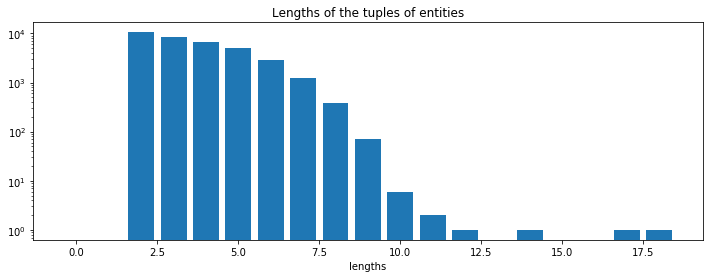

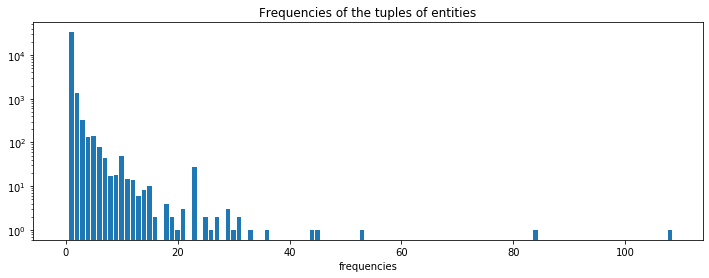

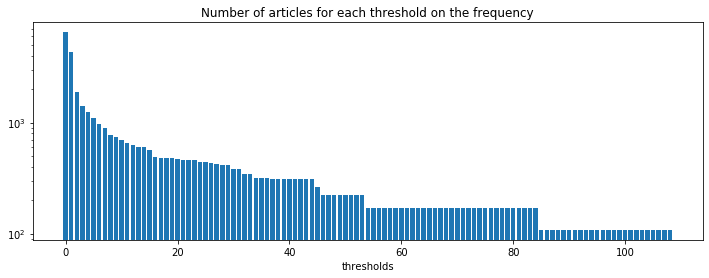

In [7]:
database.process_stats(type_='tuples')

In [8]:
database.filter(min_articles=min_articles)


Filtering the articles...
Initial length of tuples: 35466
Minimum number of articles: 1

Cleaning the database...
Initial length of articles: 6514
Criterion: Check if an article does not belong to the article ids attribute.
Final length of articles: 4353
Done (elapsed time: 0s).

Final length of tuples: 35466
Done (elapsed time: 0s).



### Preprocessing the articles

In [9]:
database.preprocess_articles()


Preprocessing the articles...

Computing the articles' annotations...
  article 1000/4353...
  article 2000/4353...
  article 3000/4353...
  article 4000/4353...
Done (elapsed time: 520s).


Computing the contexts...
  tuple 1000/35466...
  tuple 2000/35466...
  tuple 3000/35466...
  tuple 4000/35466...
  tuple 5000/35466...
  tuple 6000/35466...
  tuple 7000/35466...
  tuple 8000/35466...
  tuple 9000/35466...
  tuple 10000/35466...
  tuple 11000/35466...
  tuple 12000/35466...
  tuple 13000/35466...
  tuple 14000/35466...
  tuple 15000/35466...
  tuple 16000/35466...
  tuple 17000/35466...
  tuple 18000/35466...
  tuple 19000/35466...
  tuple 20000/35466...
  tuple 21000/35466...
  tuple 22000/35466...
  tuple 23000/35466...
  tuple 24000/35466...
  tuple 25000/35466...
  tuple 26000/35466...
  tuple 27000/35466...
  tuple 28000/35466...
  tuple 29000/35466...
  tuple 30000/35466...
  tuple 31000/35466...
  tuple 32000/35466...
  tuple 33000/35466...
  tuple 34000/35466...
  tuple 3


Computing and displaying statistics...
Done (elapsed time: 0s).



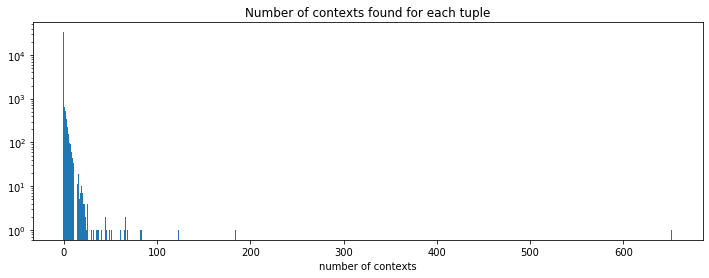

In [10]:
database.process_stats(type_='contexts')

In [11]:
database.filter(min_queries=min_queries)


Filtering the articles...
Initial length of tuples: 35466
Minimum number of queries: 1

Cleaning the database...
Initial length of articles: 4353
Criterion: Check if an article does not belong to the article ids attribute.
Final length of articles: 1517
Done (elapsed time: 4s).

Final length of tuples: 2435
Done (elapsed time: 4s).



### Processing the wikipedia information

In [12]:
#database.process_wikipedia(load=False)
database.process_wikipedia(load=True)


Processing the wikipedia information...
Attribute wikipedia loaded from results/2000/wikipedia/wikipedia_size10k_articles1_queries1.pkl.
Attribute not_wikipedia loaded from results/2000/wikipedia/not_wikipedia_size10k_articles1_queries1.pkl.
Attribute ambiguous loaded from results/2000/wikipedia/ambiguous_size10k_articles1_queries1.pkl.
Done (elapsed time: 0s).




Computing and displaying statistics...

Total number of wikipedia: 1558/not_wikipedia: 197/ambiguous: 7

Wikipedia info of 10 most frequent tuples:

Al Gore:
paragraph: Albert Arnold Gore Jr. is an American politician and environmentalist who served as the 45th vice president of the United States from 1993 to 2001. Gore was Bill Clinton's running mate in their successful campaign in 1992, and the pair was re-elected in 1996. Near the end of Clinton's second term, Gore was selected as the Democratic nominee for the 2000 presidential election but lost the election in a very close race after a Florida recount.
url: https://en.wikipedia.org/wiki/Al_Gore
Bill Bradley:
paragraph: William Warren Bradley is an American politician and former professional basketball player. He served three terms as a Democratic U.S. Senator from New Jersey. He ran unsuccessfully for the Democratic Party's nomination for president in the 2000 election.
url: https://en.wikipedia.org/wiki/Bill_Bradley

New York Ci

Done (elapsed time: 0s).



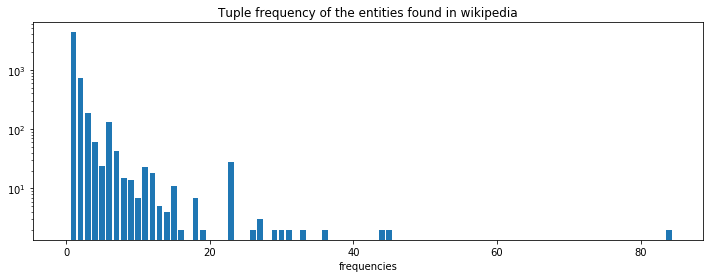

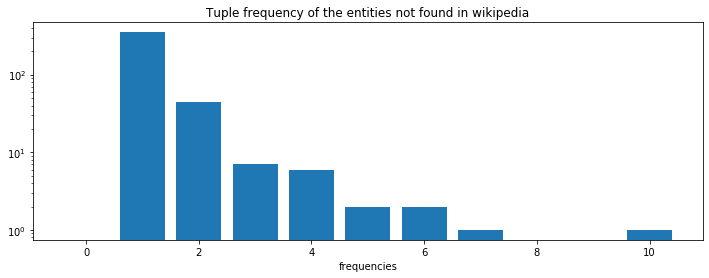

In [13]:
database.process_stats(type_='wikipedia')

### Processing the queries

In [18]:
database.process_queries(load=False)
#database.process_queries(load=True)


Processing the aggregation queries...

Computing the aggregation queries...
  tuple 1000/2435...
  tuple 2000/2435...
Done (elapsed time: 5s).

Could not save (PicklingError.
Attribute queries saved at results/2000/queries/queries_size10k_articles1_queries1.csv
Attribute queries saved at results/2000/queries/queries_short_size10k_articles1_queries1.csv
Done (elapsed time: 6s).



## Run the annotation task (annotation_task)

### Parameters

In [3]:
n_queries = 10
max_size = 10000
min_articles = 1
min_queries = 1

### Task

In [4]:
database = Database(max_size=max_size, min_articles=min_articles, min_queries=min_queries, verbose=False)
database.process_queries(load=True)


In [5]:
from pandas import DataFrame
df = DataFrame.from_dict(data=database.queries, orient='index')
df.to_csv('sffd.csv')

TypeError: must be str, not tuple

In [16]:
database.ask(n_queries)


Instructions:

The goal of this task is to perform the aggregation of the entities designated for each examples.

To help you do this in a natural and contextualized way, the entities are selected from a single New York Times article, and their mentions in the article are located in a window of a few sentences.
Besides, the title, date and abstract of each article is provided, as well as some information extracted from Wikipedia, in order to provide additional information about the entities and their possible aggregations.


Entities: George Eliot|Herbert Spencer
George Eliot: Mary Ann Evans (22 November 1819 – 22 December 1880; alternatively Mary Anne or Marian), known by her pen name George Eliot, was an English novelist, poet, journalist, translator, and one of the leading writers of the Victorian era. She wrote seven novels, including Adam Bede (1859), The Mill on the Floss (1860), Silas Marner (1861), Romola (1862–63), Middlemarch (1871–72), and Daniel Deronda (1876), most of whic

Answer: gq


Entities: Charles Darwin|George Eliot|Sarah Hrdy
Charles Darwin: Charles Robert Darwin,  (; 12 February 1809 – 19 April 1882) was an English naturalist, geologist and biologist, best known for his contributions to the science of evolution. His proposition that all species of life have descended over time from common ancestors is now widely accepted, and considered a foundational concept in science. In a joint publication with Alfred Russel Wallace, he introduced his scientific theory that this branching pattern of evolution resulted from a process that he called natural selection, in which the struggle for existence has a similar effect to the artificial selection involved in selective breeding.Darwin published his theory of evolution with compelling evidence in his 1859 book On the Origin of Species. By the 1870s, the scientific community and a majority of the educated public had accepted evolution as a fact. However, many favoured competing explanations, and it was not u

Answer: qg




## Gather the answers files (gather_answers)

In [17]:
database = Database(max_size=max_size, min_articles=min_articles, min_queries=min_queries)
database.gather()



Gathering the answers..
Object loaded from ../results/2000/answers/answer_1_size2k_articles1_queries1.pkl and file deleted.
Object loaded from ../results/2000/answers/answer_2_size2k_articles1_queries1.pkl and file deleted.
Attribute answers saved at ../results/2000/answers/answers_size2k_articles1_queries1.pkl.
Final length of answers: 9
Done (elapsed time: 0s).



# Results (TODO)

In [27]:
for sample in database.samples:
    print(Database.to_string(sample))
    print(Database.to_string(database.samples[sample]))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




88_1169192_38|39
Entities: Alan Keyes|George Bush
Alan Keyes: Alan Lee Keyes (born August 7, 1950) is an American  conservative political activist, pundit, author and former ambassador.
A doctoral graduate of Harvard University, Keyes began his diplomatic career in the U.S. Foreign Service in 1979 at the United States consulate in Bombay, India, and later in the American embassy in Zimbabwe.
Keyes was appointed Ambassador to the Economic and Social Council of the United Nations by President Ronald Reagan, and served as Reagan's Assistant Secretary of State for International Organization Affairs from 1985 to 1987; in his capacities as a UN ambassador, among Keyes's accomplishments was contributing to the Mexico City Policy.
Keyes ran for President of the United States in 1996, 2000, and 2008. He was the Republican nominee for the U.S. Senate in Maryland against Paul Sarbanes in 1988 and Barbara Mikulski in 1992, as well as in Illinois against Barack Obama in 2004. Keyes lost all three 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [18]:
database.display_tuple(0)

Entity tuples: George Bush|John Mccain




KeyError: ('George Bush', 'John Mccain')

In [19]:
database.display_tuple(1)

Entity tuples: Elian Gonzalez|Juan Gonzalez




KeyError: ('Elian Gonzalez', 'Juan Gonzalez')

In [ ]:
database.display_tuple(2)

In [ ]:
database.display_tuple(3)

In [ ]:
database.display_tuple(4)

In [ ]:
database.display_tuple(5)

In [ ]:
database.display_tuple(6)

In [ ]:
def display_tuple(self, idx):

    entity_tuple = self.tuples[idx]['tuple_']
    ids = self.tuples[idx]['ids']

    length = 0

    print("Entity tuples: {}\n\n".format(self.to_string(entity_tuple)))

    for id_ in ids:
        article = self.articles[id_]

        for type_ in article.contexts:
            contexts = article.contexts[type_][entity_tuple]
            length += len(contexts)

            print(self.to_string(contexts) + '\n\n')

    print("\n{} samples out of {} articles".format(length, len(ids)))